In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
salaries= pd.read_csv('salary.csv')


## 1. Responders and Null values

In [52]:
salaries.shape

(514, 11)

There are 514 responders in this dataset.

In [53]:
salaries.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

only one Null type value is found in our data. It is in the salaries column. An error might have happened during collection of data or the individual may have refused to disclose their salary.

In [54]:
salaries[salaries.salary.isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [115]:
exec_average= salaries[salaries.position==3].salary.mean()
salaries=salaries.fillna(exec_average)


I decided to fill the Nan value with the average salary of executives since the only person currently is an executive.

## 2. Lowest salary and lowest salary in the group

In [116]:
print(f'Highest salary is ${salaries.salary.max()}')
print(f'Lowest salary is ${salaries.salary.min()}')

Highest salary is $96156.0
Lowest salary is $29000.0


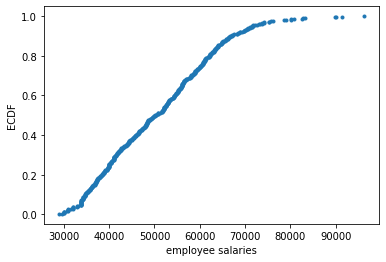

In [117]:
def ecdf(data):
    n= len(data)
    x=np.sort(data)
    y= np.arange(1, n+1)/n
    return x, y

x, y= ecdf(salaries.salary)
plt.plot(x, y, marker='.', linestyle='none')
plt.ylabel('ECDF')
plt.xlabel('employee salaries')
plt.show()

## 3. mean salary of mean. plus standard error

In [118]:
mean= salaries.salary.mean()
print(f'mean salary is ${round(mean,2)}')


mean salary is $50863.22


In [119]:
# Function to find sample mean. 
import math
def mean(arr, n) : 
  
    # loop to calculate  
    # sum of array elements. 
    sm = 0
    for i in range(0,n) : 
        sm = sm + arr[i] 
       
    return sm / n 
  
  
# Function to calculate sample 
# standard deviation. 
def SSD(arr, n) : 
    sm = 0
    for i in range(0,n) : 
        sm = sm + (arr[i] - mean(arr, n)) * (arr[i] - mean(arr, n)) 
   
    return (math.sqrt(sm / (n - 1))) 
   
   
# Function to calculate sample error. 
def sampleError(arr, n) : 
  
    # Formula to find sample error. 
    return SSD(arr, n) / (math.sqrt(n))

sampleError(salaries.salary, len(salaries.salary))

558.9715980665014

In [181]:

standard_error= stats.sem(salaries.salary)
print(f'standard error of mean is {standard_error}')

standard error of mean is 558.9715980665014


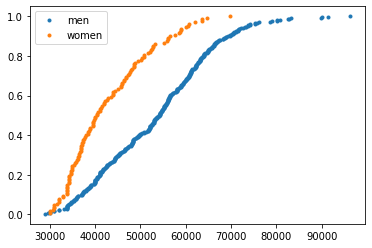

In [120]:
x_men, y_men= ecdf(salaries[salaries.male==1].salary)
x_women, y_women=ecdf(salaries[salaries.male==0].salary)

plt.plot(x_men, y_men, marker='.', linestyle='none')
plt.plot(x_women, y_women, marker='.', linestyle='none')
plt.legend(['men', 'women'])
plt.show()

Looking at the ECDF shown above, we see that women typically earn less than their male counterparts.

### 4. standard deviation for the years worked

In [127]:
salary_std= np.std(salaries.yearsworked)
print(f'standard deviation for years worked is {salary_std}')

standard deviation for years worked is 9.435503224576872


### 5. median salary

In [126]:
sort_salary= np.sort(salaries.salary)
median_salary=np.median(sort_salary)
print(f'The median salary is ${median_salary}')

#sort_salary

The median salary is $50165.5


### 6. Interquartile Range salary

In [137]:
Q1_Q3= np.percentile(salaries['salary'], [25, 75], axis=0)
IQR= Q1_Q3[1]- Q1_Q3[0]
print(f'The Interquartile Range for salaries is ${IQR}')

The Interquartile Range for salaries is $20306.25


### 7. Distribution of Gender

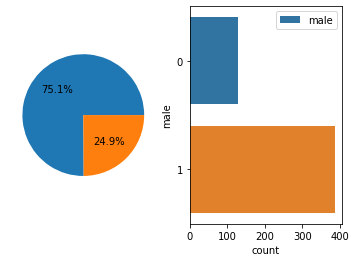

1    386
0    128
Name: male, dtype: int64

In [153]:
fig, axes = plt.subplots(1, 2)
axes[0].pie(salaries.male.value_counts(), autopct='%1.1f%%')
plt.legend(['male', 'female'])

sns.countplot(y=salaries.male, ax=axes[1])
plt.legend(['male', 'female'])
plt.show()
salaries.male.value_counts()

### 8. executives by gender

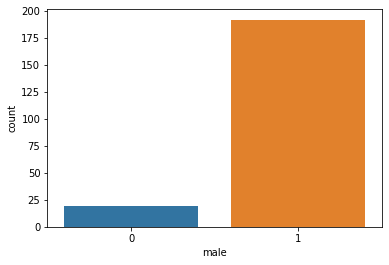

In [158]:
execs= salaries[salaries.position==3]
sns.countplot(execs.male)
plt.show()

### 9. Salaries histogram

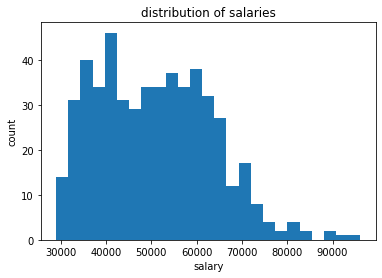

In [177]:
plt.hist(salaries.salary, bins=25)
plt.title('distribution of salaries')
plt.xlabel('salary')
plt.ylabel('count')
plt.show()


### 10. Decription of distribution of salaries

As expected, salaries are not distributed normally. The above graph shows that the salaries are skewed to the right. This is because higher level employees earn way more than the average person. Salaries can only get so low, whilst how much a person can make on the upside is infinite.

### 11. error bars

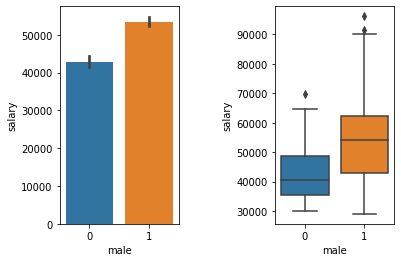

In [200]:
fig, axes= plt.subplots(1, 2)
sns.barplot(x="male", y="salary", data=salaries, ax= axes[0])

sns.boxplot(y='salary', x='male', data=salaries, ax= axes[1])
plt.subplots_adjust(wspace=0.8)
plt.show()

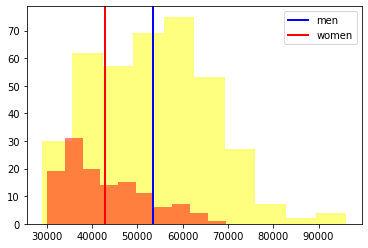

In [196]:
males = salaries[salaries.male==1].salary
females= salaries[salaries.male==0].salary

fig, ax = plt.subplots()

ax.hist(males, color='yellow', label='males',
        alpha=0.5, histtype='stepfilled')
ax.hist(females, color='red', label='females',
        alpha=0.5, histtype='stepfilled')

ax.axvline(males.mean(), color='blue', linewidth=2)
ax.axvline(females.mean(), color='red', linewidth=2)
plt.legend(['men', 'women'])
plt.show()

### 12. scatter plot with trend line

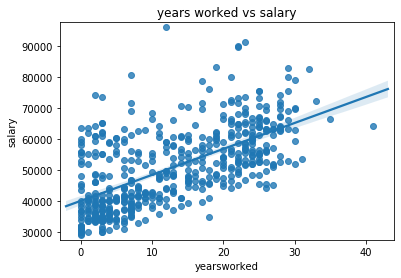

In [205]:
sns.regplot(x=salaries.yearsworked, y=salaries.salary)
plt.margins(0.02)
plt.title('years worked vs salary')
plt.show()

There seems to be a stron, positive correlation between years worked and the salary earned by a person. The average starting salary is just below 40K . There are some outliers, like the one who earns more than $90k with just over 10 years of experience whilst peers at that level of experience earn around 50K. 

In [209]:
salaries[(salaries.salary>90000) & (salaries.market>1)]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
280,91405.0,0,23,14,1.18,1,0,3,1,1,0
377,96156.0,20,12,12,1.19,1,0,3,1,1,2


We can see that all the people who earn way above market salary are all executives (position 3). This is not surprising as they may be of bigger companies of part of the founding teams of companies which is why they get more than the average market salary.
All of them are male individuals with degrees.

In [245]:
above= salaries[salaries.market>1.33]
above.head(7)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
6,61008.0,0,2,2,1.33,1,0,1,1,2,0
24,61008.0,0,2,2,1.33,1,0,1,1,2,1
46,59110.0,0,4,4,1.33,1,0,1,1,1,0
65,63155.0,0,6,0,1.33,1,0,2,1,1,0
66,58118.0,0,5,5,1.33,1,0,1,1,1,0
178,59564.0,0,19,14,1.33,1,0,2,1,2,1
206,71543.0,13,7,7,1.33,1,1,3,1,2,3


of all of the people who earn 33% above their market average, they are all male and are in the fields of Engineering and finance.

In [247]:
salaries.market.max()

1.330000043

### 13. Pearson correlation

In [252]:
stats.pearsonr(salaries.yearsworked, salaries.salary)

(0.6231354820920552, 1.2747795189693407e-56)

The correlation between years worked and salaries has a

In [251]:
from scipy.stats import linregress
linregress(salaries.yearsworked, salaries.salary)

LinregressResult(slope=836.1146593817587, intercept=40117.3573743423, rvalue=0.6231354820920547, pvalue=1.2747795189691712e-56, stderr=46.37868034343537)